## [3] 음악 장르 예측 및 Grid 찾기

##### 목적 : feature(tempo, beats, mfmc...) 등을 활용하여 음악장르 찾기 = label
##### 방법 : Grid_Search를 활용하여 최적화 파라미터 서칭 및 모델 구축
##### 결론  및 인사이트 : 클래식음악, 메탈 음악 등 템포와 비트가 도드라지는 음악장르는 정확도가 높게 예측 가능함.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
#인라인은 박스의 반대말 -> 한줄 안에 다 넣어버리겠다
from sklearn.model_selection import train_test_split, KFold, GridSearchCV #K폴드, 그리드서치 방법 임포트

In [2]:
music = pd.read_csv('music_genre_data_refine.csv', encoding='utf-8', error_bad_lines=False)

In [3]:
music

,tempo,beats,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,label
0,103.359375,50,0.380260,0.248262,2116.942959,1956.611056,4196.107960,0.127272,-26.929785,blues
1,95.703125,44,0.306451,0.113475,1156.070496,1497.668176,2170.053545,0.058613,-233.860772,blues
2,151.999081,75,0.253487,0.151571,1331.073970,1973.643437,2900.174130,0.042967,-221.802549,blues
3,184.570312,91,0.269320,0.119072,1361.045467,1567.804596,2739.625101,0.069124,-207.208080,blues
4,161.499023,74,0.391059,0.137728,1811.076084,2052.332563,3927.809582,0.075480,-145.434568,blues
...,...,...,...,...,...,...,...,...,...,...
995,123.046875,59,0.418812,0.166056,2312.030070,2060.825761,4528.197619,0.140588,-41.402023,rock
996,117.453835,56,0.335774,0.093676,2553.856706,2219.090892,5123.752351,0.136173,-121.410791,rock
997,103.359375,45,0.372834,0.208743,1345.850763,1841.748033,2939.265560,0.041099,-127.946876,rock
998,112.347147,45,0.344472,0.180163,1675.475369,1653.422860,3253.563659,0.087294,-98.356322,rock


In [4]:
#Label = 장르 정답 데이터
#학습데이터는 tempo 부터 mfcc1 까지 넣을 예정

In [5]:
# 데이터셋 중 타겟데이터 추출
y = music['label']
y
# feature engineering - 타겟데이터 라벨링을 통한 성능 개선 시도하기


0      blues
1      blues
2      blues
3      blues
4      blues
       ...  
995     rock
996     rock
997     rock
998     rock
999     rock
Name: label, Length: 1000, dtype: object

In [6]:
# 데이터셋 중 요인데이터 추출
x = music.drop('label', axis=1)
x

,tempo,beats,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1
0,103.359375,50,0.380260,0.248262,2116.942959,1956.611056,4196.107960,0.127272,-26.929785
1,95.703125,44,0.306451,0.113475,1156.070496,1497.668176,2170.053545,0.058613,-233.860772
2,151.999081,75,0.253487,0.151571,1331.073970,1973.643437,2900.174130,0.042967,-221.802549
3,184.570312,91,0.269320,0.119072,1361.045467,1567.804596,2739.625101,0.069124,-207.208080
4,161.499023,74,0.391059,0.137728,1811.076084,2052.332563,3927.809582,0.075480,-145.434568
...,...,...,...,...,...,...,...,...,...
995,123.046875,59,0.418812,0.166056,2312.030070,2060.825761,4528.197619,0.140588,-41.402023
996,117.453835,56,0.335774,0.093676,2553.856706,2219.090892,5123.752351,0.136173,-121.410791
997,103.359375,45,0.372834,0.208743,1345.850763,1841.748033,2939.265560,0.041099,-127.946876
998,112.347147,45,0.344472,0.180163,1675.475369,1653.422860,3253.563659,0.087294,-98.356322


In [7]:
#트,테 데이터 분류
# 학습용 요인, 결과, 검증용 요인, 결과 셋으로 데이터를 분리
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [8]:
x_train

,tempo,beats,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1
341,117.453835,54,0.415676,0.206754,2308.771409,2277.901948,4944.086770,0.117602,-56.876727
783,103.359375,50,0.522647,0.321615,3662.949570,3276.425158,7776.827975,0.156007,-39.992814
762,151.999081,74,0.330304,0.189702,2928.600767,3201.011322,6817.100445,0.105741,-106.806397
24,172.265625,79,0.336773,0.158098,1442.190271,1870.534155,3083.414688,0.050889,-155.504931
701,78.302557,38,0.360462,0.138195,2765.747194,3222.713605,6873.391771,0.096015,-119.320605
...,...,...,...,...,...,...,...,...,...
673,135.999178,67,0.446211,0.220483,2566.803635,2408.484762,5444.433745,0.125209,-12.499903
859,151.999081,75,0.476249,0.080634,3002.851704,2214.524618,5293.851322,0.186434,-155.655322
669,151.999081,74,0.440920,0.149154,2741.118114,2302.191500,5409.383957,0.159985,-41.997244
424,95.703125,47,0.417792,0.206960,2447.828102,2780.016074,5317.059515,0.088603,-140.168498


In [9]:
y_train

341     disco
783       pop
762       pop
24      blues
701       pop
        ...  
673     metal
859    reggae
669     metal
424    hiphop
812    reggae
Name: label, Length: 800, dtype: object

In [10]:
#8대2로 분류된것 확인

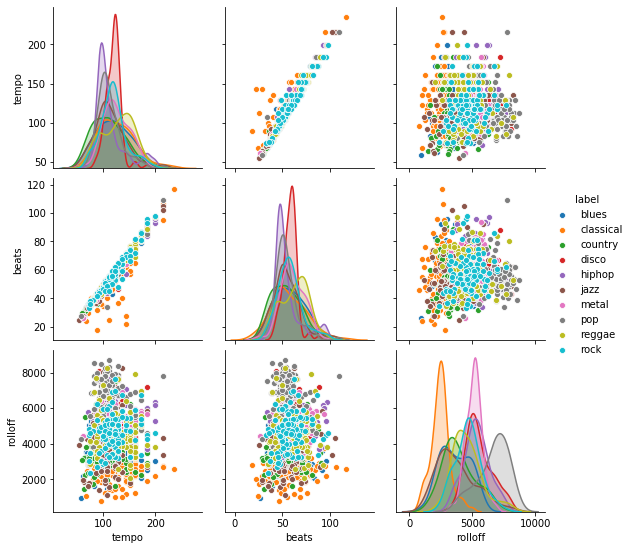

In [12]:
#그래프 1.
sns.pairplot(music, hue='label', vars=['tempo', 'beats', 'rolloff'])

#장르별로 분류

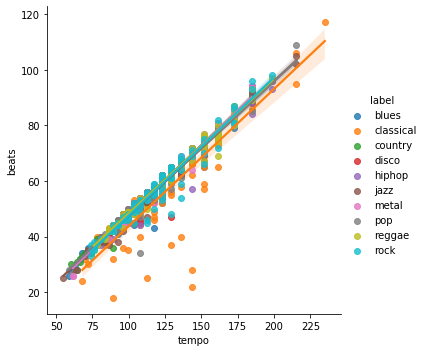

In [14]:
# 그래프2.
sns.lmplot(x = 'tempo',hue='label', y = 'beats', data = music)

##### 음악은 비트가 빨라질수록, 대체적으로 템포가 빨라짐을 알 수 있다. 
##### 그러나, classical 음악(주황색)은 가끔 tempo가 높아도 beats가 낮은 특징을 알 수 있다.
##### 비트 = 드럼으로 연주하는 패턴(==타악기 등으로 주기적으로 음을 끊는것)
##### 템포 = 패턴이 연주되는 속도 (= Beat per Minute) 으로도 표현되는데, 클래식 음악의 특징상 
##### 타악기(=드럼)과 같은 악기의 일정한 패턴은 느리기 때문에, tempo가 높다하더라도 beat는 낮은 경우를 볼 수 있다.

## 2-1. 교차검증을 통해 KNN,SVM,RF,Decision Tree 중 어떤게 Best인지 확인

In [15]:
from sklearn.model_selection import cross_val_score #CV Cross Validation 교차검증 방법
from sklearn.svm import SVC #서포트 백터머신 임포트

### 1. SVM

In [16]:
svc = SVC()

In [17]:
svc.fit(x_train, y_train) #훈련

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [18]:
scores_svc = cross_val_score(svc, x_train, y_train, cv = 10)

In [19]:
scores_svc # SVC 모델로 train data 가 들어왔을때, 각 label에 맞는 정답 정확도 결과

array([0.3   , 0.3125, 0.325 , 0.3125, 0.2625, 0.325 , 0.25  , 0.2625,
       0.3125, 0.3   ])

In [20]:
scores_svc.mean() #SVC 모델 평균 정확도 결과 

0.29625

### 2. KNN

In [21]:
from sklearn.neighbors import KNeighborsClassifier

In [22]:
knn = KNeighborsClassifier(n_neighbors=3) #최근접 이웃방식으로 모델 예측, 주위 3개까지 가져옴! 홀수만

In [23]:
knn.fit(x_train, y_train) #train 데이터로 y데이터를 예측해보아라

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [24]:
scores_knn = cross_val_score(knn, x_train, y_train, cv= 10)

In [25]:
scores_knn #KNN 모델로 train data 가 들어왔을때, 각 label에 맞는 정답 정확도 예측

array([0.3375, 0.35  , 0.2875, 0.35  , 0.2875, 0.3375, 0.25  , 0.275 ,
       0.35  , 0.2875])

In [26]:
scores_knn.mean() #KNN 모델 평균 정확도 결과

0.31124999999999997

## 3. Decision Tree

In [27]:
from sklearn.tree import DecisionTreeClassifier

In [28]:
tree_clf = DecisionTreeClassifier(max_depth=8, random_state=13) #Decsion Tree

In [29]:
tree_clf.fit(x_train, y_train) #디씨션 트리로 학습
print('Scroe :', format(tree_clf.score(x_train,y_train))) #트리 정확도는 0.723

Scroe : 0.73125


In [30]:
scores_tree = cross_val_score(tree_clf, x_train, y_train, cv= 10) #교차검증 10개 하였을때?

In [31]:
scores_tree

array([0.3875, 0.4625, 0.425 , 0.4625, 0.3875, 0.45  , 0.35  , 0.4375,
       0.45  , 0.4125])

In [32]:
scores_tree.mean() #트리모델 정답 평균

0.4225

## 4. Random Forest

In [33]:
from sklearn.ensemble import RandomForestClassifier

In [34]:
clf_rf = RandomForestClassifier()

In [35]:
clf_rf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [36]:
scores_rf = cross_val_score(clf_rf, x_train, y_train, cv= 10) #교차검증 10개 하였을때?

In [37]:
scores_rf

array([0.575 , 0.575 , 0.5625, 0.55  , 0.4625, 0.55  , 0.5   , 0.5625,
       0.5125, 0.525 ])

In [38]:
scores_rf.mean() #RF 모델

0.5375000000000001

#### CV=10 으로 하였을땐, RF 모델이 제일 분류화 예측을 잘하는 것 같다.

## 5. Grid Search를 활용하여 분류 최적화 방법 선정

In [53]:
from sklearn.model_selection import KFold, GridSearchCV

In [54]:
kfold = KFold(n_splits=5, shuffle=True, random_state=0) # n_splits 는 데이터 분할 수 입니다. 전체 데이터 수를 넘을 수 없습니다.

In [55]:
values = [0.0001, 0.01, 0.1, 1, 10, 100] #c, gamma 를 하이퍼 파라미터로 조정 할 예정, values(list) 만큼

In [56]:
#RBF 또는 Linear 
#RBF 방법과 Linear 방법 둘 다 씀, Kernel 은 프로그래밍의 핵심!, C와 Gamma 에 Values 의 리스트를 넣어, 6x6 방식만큼 경우의 수로 
#트레인 데이터 샘플을 나누어 학습하겠다.

param_grid = [
    {'kernel' : ['rbf'], 'C':values, 'gamma' : values},
    {'kernel' : ['linear'], 'C': values }
]

In [57]:
grid_search_svc = GridSearchCV(svc, param_grid, cv=kfold) #cv= Cross_validation는 K-Fold 방식(데이터를 분할한것)

## K-fold 방식과 Grid Search를 활용하여, svc 모델의 하이퍼 파라미터를 재조정하고
## 정확도를 최적화해봄

In [58]:
grid_search_svc

GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
             error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [0.0001, 0.01, 0.1, 1, 10, 100],
                          'gamma': [0.0001, 0.01, 0.1, 1, 10, 100],
                          'kernel': ['rbf']},
                         {'C': [0.0001, 0.01, 0.1, 1, 10, 100],
                          'kernel': ['linear']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [59]:
# grid_search_svc.fit(x_train, y_train)
#grid_search_svc 는 하이퍼 파라미터가 재 조정된 모델 / 재학습
#gird_search 해당 모델은 너무 오래걸려서 중지함

## cv = 10 으로해서 제일 높았던 정확도를 보인 RF로, 최적의 파라미터(Grid_Search)와 K-fold 를 통해 학습함

In [60]:
params_rf = [
    {"n_estimators": [10, 20, 30, 40, 50], "max_depth": [3, 5, 7, 9, None], "max_features": [3, 4, 5, None]}
]
#Rf 파라미터

In [61]:
# 각각의 분류기에 대한 최적 파라미터 찾기
#clf = GridSearchCV(SVC(), params, n_jobs=-1) #n_jobs CPU가 다쓸것인가 선택해줄것인가. 다쓰렴 -> -1
clf_rf = GridSearchCV(RandomForestClassifier(), params_rf, n_jobs=-1)

In [62]:
clf_rf

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              ra

In [63]:
# 최적 랜덤포레스트 분류기
clf_rf.estimator

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [68]:
# 정확성 검증을 위한 라이브러리
from sklearn.metrics import accuracy_score

In [69]:
clf_rf.best_params_ 
#위의 RF(랜덤포레스트) 가장 최적화된 하이퍼 파라미터는 depth 9, features 5, 분류기 40개인듯

{'max_depth': 9, 'max_features': 4, 'n_estimators': 50}

In [70]:
clf_rf.best_score_
#정확도 53% 예측 모델(테스트 데이터로 학습)

0.54625

In [71]:
# Random Forest 학습시켜서 모델 생성
clf_rf.fit(x_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              ra

In [72]:
# 예측하기
y_pred = clf_rf.predict(x_test)

In [73]:
# 정확성 검증을 위한 라이브러리
from sklearn.metrics import accuracy_score

In [74]:
print('정답률 ', accuracy_score(y_test, y_pred))
#실제데이터를 넣은 정확도는 50% 정도이다

정답률  0.515


## 6.  정확도, 재현율  f1 score

In [75]:
# 검정 작업을 위한 라이브러리
from sklearn.metrics import classification_report

In [76]:
# 검정 결과 프린트
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       blues       0.69      0.46      0.55        24
   classical       0.86      0.79      0.83        24
     country       0.36      0.56      0.43        18
       disco       0.38      0.50      0.43        22
      hiphop       0.42      0.44      0.43        18
        jazz       0.33      0.50      0.40        12
       metal       0.82      0.82      0.82        17
         pop       0.63      0.55      0.59        22
      reggae       0.47      0.50      0.49        18
        rock       0.23      0.12      0.16        25

    accuracy                           0.52       200
   macro avg       0.52      0.52      0.51       200
weighted avg       0.53      0.52      0.51       200



#### classic 음악에 대해서 precision은 80% 예측 정확률이 높다. f1-score 또한 72%로 높은 편.
#### rf 모델로 클래식 특징의 피처(템포, 음 스펙트럼) 등으로 예측을 했을경우 클래식에 대한 정답률은 신뢰성을 가질 수 있다.
#### metal(=rock 음악중에서도 템포가 빠르고, 전자음이나 강한 음악 악기사용이 짙은 것)도 70%로 높은 f1-score를 가진다.
#### 이는, 다른장르에 비해 클래식(=낮은템포와 악기의 사용)이 일반적 장르(Pop이나 hiphop) 에 비해 확연한 특징을 가지기 때문일 수도 있다.
#### 메탈 또한, 다른 음악 장르와 비교하여 고유한 음악적 특성이 존재하기 때문임.
#### 만약, 위의 RF 모델로 어떤 음악을 들려주고 맞추도록 한다면, 클래식>메탈>pop 등은 classifcation(분류) 가 높다.

In [77]:
# 7. 피처로 음악 장르 예측해보기  /  revenue, debt, netasset, surplus
# 해당 파라미터는 music table의 1번 로우인 blues 와 동일하게 넣어봄(테스트)
# blues의 특징과 동일함
blues = [103.359375, 50, 0.380260, 0.248262, 2116.942959, 1956.611056, 4196.107960, 0.127272, 26.929785]
clf_rf.predict_proba([blues])

array([[0.31772537, 0.06736681, 0.09905163, 0.07002429, 0.01475744,
        0.04019062, 0.09718817, 0.07603335, 0.02931071, 0.18835161]])

In [81]:
y

0      blues
1      blues
2      blues
3      blues
4      blues
       ...  
995     rock
996     rock
997     rock
998     rock
999     rock
Name: label, Length: 1000, dtype: object